# California Housing Dataset Analysis and Linear Regression Model

In [42]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
cali_housing = fetch_california_housing().

In [11]:
df = pd.DataFrame(data = cali_housing.data, columns = cali_housing.feature_names)

In [12]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [49]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [13]:
df_target = pd.DataFrame(data = cali_housing.target, columns = cali_housing.target_names)

In [14]:
df_target

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


<Axes: ylabel='Count'>

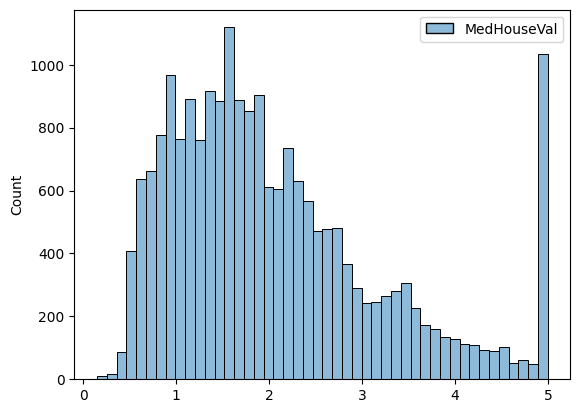

In [18]:
sns.histplot(df_target)

In [19]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [21]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(4128, 4128, 12384)

In [23]:
idx = np.arange(n)

np.random.seed(10)
np.random.shuffle(idx)
idx

array([20303, 16966, 10623, ..., 17728,  7293, 17673])

In [28]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

y_train = df_target.iloc[:n_train].values
y_val = df_target.iloc[n_train:n_train+n_val].values
y_test = df_target.iloc[n_train+n_val:].values

In [30]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [33]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [36]:
X_train = df_train.values

In [37]:
w0, w = train_linear_regression(X_train, y_train)

In [38]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

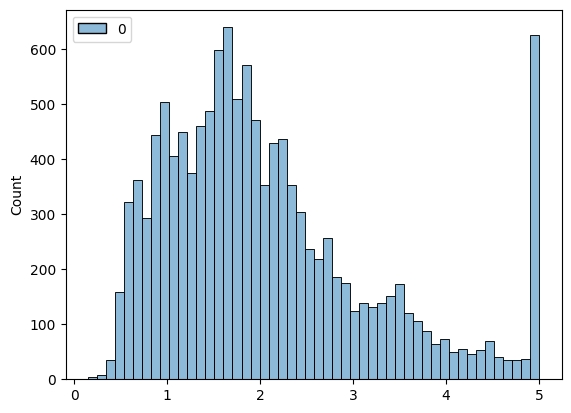

In [46]:
#sns.histplot(y_pred, bins=50, color='blue', alpha=0.5)
sns.histplot(y_train, bins=50, color='red', alpha=0.5)

In [44]:
def rmse(y, y_pred):
    se = (y_pred - y) ** 2
    mse = np.mean(se)
    return np.sqrt(mse)

In [45]:
rmse(y_train, y_pred)

0.734302817008358

In [47]:
X_val = df_val.values
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7592729734445661

In [48]:
X_test = df_test.values
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

0.7162693046666493